#ASSIGNMENT 1


---
###Mobile price range:


In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Mobiletest.csv")
df_train = pd.read_csv("/content/drive/MyDrive/Mobiletrain.csv")

In [3]:
df_train = df_train.dropna()
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
df_train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [58]:
X = df_train.iloc[:,:]
X = X.drop('price_range',axis = 1)
print(X.shape)
y = df_train['price_range']
print(y.shape)

(2000, 20)
(2000,)


In [59]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(20,)),
    keras.layers.Dense(10, activation='sigmoid')
])

In [61]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X,y,epochs=100,batch_size=32)

Epoch 1/100
63/63 [==============================] - 1s 2ms/step - loss: 4.4588 - accuracy: 0.6405
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 3.9150 - accuracy: 0.6710
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 2.5957 - accuracy: 0.6920
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 1.6910 - accuracy: 0.7210
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 2.6632 - accuracy: 0.6645
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 2.4607 - accuracy: 0.6675
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 2.2395 - accuracy: 0.6980
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 3.6943 - accuracy: 0.6400
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 2.6639 - accuracy: 0.6745
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 2.7522 - accuracy: 0.6745
Epoch 11/

In [8]:
x_test = df.drop('id',axis = 1)
y_predict = model.predict(x_test)

32/32 [==============================] - 1s 5ms/step


In [9]:
y_predicted = [np.argmax(i) for i in y_predict]

# ASSIGNMENT - 2


---
###Fashion_Mnist




In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [12]:
fm = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fm.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [13]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
y_train[0]

9

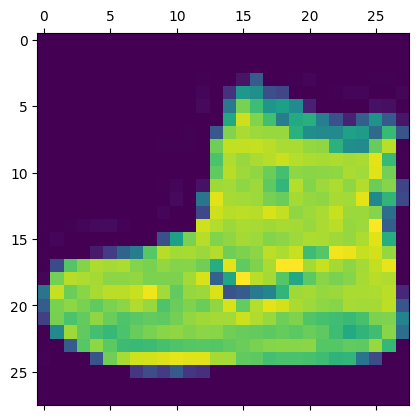

In [15]:
plt.matshow(X_train[0])

In [16]:
X_train = X_train/255

In [17]:
X_test = X_test/255

In [18]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [21]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5066 - accuracy: 0.8234
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3831 - accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3466 - accuracy: 0.8732
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3211 - accuracy: 0.8812
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3041 - accuracy: 0.8870


In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: ", accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8751
Accuracy:  0.8751000165939331


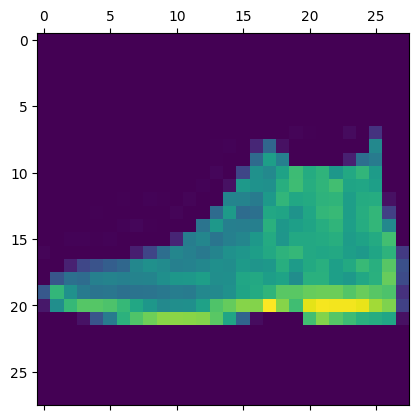

In [23]:
plt.matshow(X_test[0])

In [24]:
yp = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [25]:
np.argmax(yp[0])

9

In [26]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [27]:
class_labels[np.argmax(yp[0])]

'Ankle boot'

# ASSIGNMENT - 3
---

###Penguin Species

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras.models
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Input, Flatten, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
df = pd.read_csv('/content/drive/MyDrive/penguins.csv')

In [30]:
df.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [31]:
df = df.dropna(how = 'any')
df.isnull().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [32]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [33]:
df['species'] = df['species'].replace({'Adelie': 1,'Gentoo':2,'Chinstrap':3})

In [34]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [35]:
df['sex'] = df['sex'].replace({'male': 1,'female':2})

In [36]:
X = df[['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g','sex']]
y = df['species']

In [37]:
df.head()

rowid  species     island  bill_length_mm  bill_depth_mm  \
0      1        1  Torgersen            39.1           18.7   
1      2        1  Torgersen            39.5           17.4   
2      3        1  Torgersen            40.3           18.0   
4      5        1  Torgersen            36.7           19.3   
5      6        1  Torgersen            39.3           20.6   

   flipper_length_mm  body_mass_g  sex  year  
0              181.0       3750.0    1  2007  
1              186.0       3800.0    2  2007  
2              195.0       3250.0    2  2007  
4              193.0       3450.0    2  2007  
5              190.0       3650.0    1  2007

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [39]:
X_train.shape

(233, 5)

In [40]:
y_train.shape

(233,)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(5,)),
    keras.layers.Dense(10, activation='sigmoid')
])

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               600       
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,610
Trainable params: 1,610
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
8/8 [==============================] - 1s 2ms/step - loss: 2.2622 - accuracy: 0.2747
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 1.9852 - accuracy: 0.3948
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 1.7255 - accuracy: 0.5622
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 1.4853 - accuracy: 0.7768
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 1.2677 - accuracy: 0.9013
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 1.0709 - accuracy: 0.8884
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9017 - accuracy: 0.8970
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 0.7554 - accuracy: 0.8841
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.8841
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5398 - accuracy: 0.9013
Epoch 11/50
8/8 [======================

In [45]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.0468 - accuracy: 0.9900
Loss: 0.04681779444217682
Accuracy: 0.9900000095367432


#ASSIGNMENT-4

---
###Heart Disease


In [46]:
from sklearn.model_selection import train_test_split

def readTrainTestData():
  names = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall','output']
  path = ('/content/drive/MyDrive/heart.csv')
  df = pd.read_csv(path, names=names,header=0)

  columns_norm = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']

  X_Data = df[columns_norm]
  X_Data = X_Data.apply(lambda x:( (x - x.min()) / (x.max()-x.min())))

  Y_Data = df["output"]
  X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size=0.3 ,random_state=42)

  return X_Train, X_Test, Y_Train, Y_Test

In [47]:
from tensorflow import feature_column
import tensorflow as tf

def create_feature_column():
  age = tf.feature_column.numeric_column('age')
  sex = tf.feature_column.numeric_column('sex')
  cp = tf.feature_column.numeric_column('cp')
  trtbps = tf.feature_column.numeric_column('trtbps')
  chol = tf.feature_column.numeric_column('chol')
  fbs = tf.feature_column.numeric_column('fbs')
  restecg = tf.feature_column.numeric_column('restecg')
  thalachh = tf.feature_column.numeric_column('thalachh')
  exng = tf.feature_column.numeric_column('exng')
  oldpeak = tf.feature_column.numeric_column('oldpeak')
  slp = tf.feature_column.numeric_column('slp')
  caa = tf.feature_column.numeric_column('caa')
  thall = tf.feature_column.numeric_column('thall')


  feature_column = [age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall]

  return feature_column

In [48]:
X_Train, X_Test, Y_Train, Y_Test = readTrainTestData()
feature_column = create_feature_column()

input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_Train, y=Y_Train, batch_size=40, num_epochs=1000, shuffle=True)

eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_Test, y=Y_Test, batch_size=40, num_epochs=1, shuffle=False)

predict_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_Test, num_epochs=1, shuffle=True)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.

Instructions for updating:
Use tf.keras instead.


In [49]:
model = tf.estimator.LinearClassifier(feature_columns=feature_column, n_classes=3)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [50]:
history = model.train(input_fn=input_func, steps=1000)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras i

In [51]:
results = model.evaluate(eval_input_func)

Instructions for updating:
Use tf.keras instead.


In [52]:
results["accuracy"]

0.8021978